<a href="https://colab.research.google.com/github/GWANGHYUNYU/pytorch-tutorial/blob/master/Lab_06_Softmax_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# **Softmax**

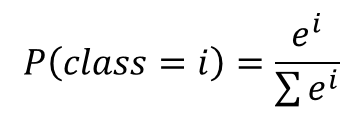

In [ ]:
z = torch.FloatTensor([1, 2, 3])

In [ ]:
hypothesis = F.softmax(z, dim=0)
print(hypothesis)

tensor([0.0900, 0.2447, 0.6652])


In [ ]:
print(hypothesis.sum())

tensor(1.)


# **Cross Entropy Loss (Low-Level)**

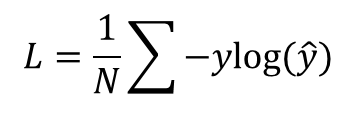

In [ ]:
z = torch.rand(3, 5, requires_grad=True)
print(z, z.shape)
hypothesis = F.softmax(z, dim=1)
print(hypothesis)

tensor([[0.6915, 0.2099, 0.3639, 0.1891, 0.8332],
        [0.1707, 0.9429, 0.2238, 0.5814, 0.3628],
        [0.8757, 0.7088, 0.1245, 0.6975, 0.2763]], requires_grad=True) torch.Size([3, 5])
tensor([[0.2442, 0.1508, 0.1760, 0.1477, 0.2813],
        [0.1441, 0.3120, 0.1520, 0.2173, 0.1746],
        [0.2700, 0.2285, 0.1274, 0.2259, 0.1483]], grad_fn=<SoftmaxBackward>)


In [ ]:
y = torch.randint(5, (3,)).long()
print(y)

tensor([0, 4, 2])


In [ ]:
y_one_hot = torch.zeros_like(hypothesis)
y_one_hot.scatter_(1, y.unsqueeze(1), 1)

tensor([[1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0.]])

In [ ]:
cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()
print(cost)

tensor(1.7385, grad_fn=<MeanBackward0>)


# **Cross-entropy Loss with `torch.nn.functional`**

In [ ]:
# Low level
torch.log(F.softmax(z, dim=1))

tensor([[-1.4100, -1.8915, -1.7375, -1.9124, -1.2683],
        [-1.9371, -1.1649, -1.8841, -1.5265, -1.7450],
        [-1.3094, -1.4763, -2.0607, -1.4876, -1.9088]], grad_fn=<LogBackward>)

In [ ]:
# High level
F.log_softmax(z, dim=1)

tensor([[-1.4100, -1.8915, -1.7375, -1.9124, -1.2683],
        [-1.9371, -1.1649, -1.8841, -1.5265, -1.7450],
        [-1.3094, -1.4763, -2.0607, -1.4876, -1.9088]],
       grad_fn=<LogSoftmaxBackward>)

In [ ]:
# Low level
(y_one_hot * -torch.log(F.softmax(z, dim=1))).sum(dim=1).mean()

tensor(1.7385, grad_fn=<MeanBackward0>)

In [ ]:
# High level
F.nll_loss(F.log_softmax(z, dim=1), y)

tensor(1.7385, grad_fn=<NllLossBackward>)

In [ ]:
F.cross_entropy(z, y)

tensor(1.7385, grad_fn=<NllLossBackward>)

# **Training with Low-level Cross Entropy Loss**

In [ ]:
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

In [ ]:
# 모델 초기화
W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산 (1)
    hypothesis = F.softmax(x_train.matmul(W) + b, dim=1) # or .mm or @
    y_one_hot = torch.zeros_like(hypothesis)
    y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)
    cost = (y_one_hot * -torch.log(F.softmax(hypothesis, dim=1))).sum(dim=1).mean()

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.901535
Epoch  200/1000 Cost: 0.839114
Epoch  300/1000 Cost: 0.807826
Epoch  400/1000 Cost: 0.788472
Epoch  500/1000 Cost: 0.774822
Epoch  600/1000 Cost: 0.764449
Epoch  700/1000 Cost: 0.756191
Epoch  800/1000 Cost: 0.749398
Epoch  900/1000 Cost: 0.743671
Epoch 1000/1000 Cost: 0.738749


# **Training with `F.cross_entropy`**

In [ ]:
# 모델 초기화
W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # Cost 계산 (2)
    z = x_train.matmul(W) + b # or .mm or @
    cost = F.cross_entropy(z, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.761050
Epoch  200/1000 Cost: 0.689991
Epoch  300/1000 Cost: 0.643229
Epoch  400/1000 Cost: 0.604117
Epoch  500/1000 Cost: 0.568256
Epoch  600/1000 Cost: 0.533922
Epoch  700/1000 Cost: 0.500291
Epoch  800/1000 Cost: 0.466908
Epoch  900/1000 Cost: 0.433507
Epoch 1000/1000 Cost: 0.399962


# **High-level Implementation with `nn.Module`**

In [ ]:
class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(4, 3) # Output이 3!

    def forward(self, x):
        return self.linear(x)

In [ ]:
model = SoftmaxClassifierModel()

In [ ]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    prediction = model(x_train)
    
    # Cost 계산
    cost = F.cross_entropy(prediction, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.815485
Epoch  100/1000 Cost: 0.642524
Epoch  200/1000 Cost: 0.561113
Epoch  300/1000 Cost: 0.507624
Epoch  400/1000 Cost: 0.463745
Epoch  500/1000 Cost: 0.424595
Epoch  600/1000 Cost: 0.387937
Epoch  700/1000 Cost: 0.352313
Epoch  800/1000 Cost: 0.316583
Epoch  900/1000 Cost: 0.280166
Epoch 1000/1000 Cost: 0.247546


# Loading Real Data

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


일반적인 Colab Notebooks 경로

In [ ]:
!ls /gdrive/My\ Drive/Colab\ Notebooks/Pytorch/pytorch_for_everyone/data/

01_test_score.csv  03_diabetes.txt  04_zoo.txt	faces  Plant_dataset


In [ ]:
import numpy as np
dataset = np.loadtxt('/gdrive/My Drive/Colab Notebooks/Pytorch/pytorch_for_everyone/data/04_zoo.txt', delimiter=',', dtype=np.float32)
# dataset = pd.read_csv('/gdrive/My\ Drive/Colab\ Notebooks/Pytorch/pytorch_for_everyone/data/01_test_score.csv', delimiter='\t')
print(dataset.shape)
print(len(dataset))
print(dataset[:5])

(101, 17)
101
[[1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 4. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 4. 1. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 3.]
 [1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 4. 0. 0. 1. 0.]
 [1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 4. 1. 0. 1. 0.]]


# DATA

In [ ]:
x_train = torch.FloatTensor(dataset[:, 0:-1])
y_train = torch.LongTensor(dataset[:, [-1]]).squeeze()

In [ ]:
print(x_train.shape) # x_train shape
print(len(x_train))  # x_train 길이
print(x_train[:5])   # 첫 다섯 개

torch.Size([101, 16])
101
tensor([[1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 4., 0., 0., 1.],
        [1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 4., 1., 0., 1.],
        [0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0.],
        [1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 4., 0., 0., 1.],
        [1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 4., 1., 0., 1.]])


In [ ]:
print(y_train.shape) # x_train shape
print(len(y_train))  # x_train 길이
print(y_train[:5])   # 첫 다섯 개

torch.Size([101])
101
tensor([0, 0, 3, 0, 0])


In [ ]:
class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(16, 7)
    def forward(self, x):
        return self.linear(x)

In [ ]:
model = SoftmaxClassifierModel()

In [ ]:
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    prediction = model(x_train)

    # cost 계산
    cost = F.cross_entropy(prediction, y_train)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 20번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, cost.item()
        ))

Epoch    0/1000 Cost: 1.838569
Epoch  100/1000 Cost: 0.475998
Epoch  200/1000 Cost: 0.318837
Epoch  300/1000 Cost: 0.245350
Epoch  400/1000 Cost: 0.200861
Epoch  500/1000 Cost: 0.170597
Epoch  600/1000 Cost: 0.148521
Epoch  700/1000 Cost: 0.131638
Epoch  800/1000 Cost: 0.118278
Epoch  900/1000 Cost: 0.107425
Epoch 1000/1000 Cost: 0.098427
